In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# create empty lists to hold city data
coordinates=[]
city_names=[]

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
coordinates = zip(lats, longs)

In [3]:
# Identify nearest city for each lat, lng combination
for coord_pair in coordinates:
    city = citipy.nearest_city(coord_pair[0], coord_pair[1]).city_name
    if city not in city_names:
        city_names.append(city)
        
# Print the city count to confirm sufficient count - although I'm unsure of how many is sufficient
print(f"Number of cities in the list: {len(city_names)}")

Number of cities in the list: 627


In [4]:
# seems like enough.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial" #since that's what I'm used to

# Define an empty list to fetch the weather data for each city
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Add in a bunch of counters in case you wanna see that
record_count = 1
set_count = 1

# loop through all the cities and request data for them    
for i, city in enumerate(city_names):
    if (i % 50 == 0 and i >= 50):
        print(f"Finished set {set_count}")
        set_count += 1
        record_count = 0
        
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # I don't actually want to print 600ish lines to read
    
    # Add 1 to the record count or don't, up to you
    record_count += 1
    # Originally I had this at 5 seconds and didn't encounter any issues, but it did take so long to run
    time.sleep(1)
    
    # Build the url and run an API request for each of the cities
    query_url=f"{base_url}appid={api_key}&q={city}&units={units}"
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        #add city data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print(f"Oops, city {city} not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Oops, city taolanaro not found. Skipping...
Oops, city palabuhanratu not found. Skipping...
Oops, city belushya guba not found. Skipping...
Finished set <class 'set'>
Oops, city amderma not found. Skipping...
Oops, city barentsburg not found. Skipping...
Oops, city karaul not found. Skipping...
Oops, city nizhneyansk not found. Skipping...
Oops, city tumannyy not found. Skipping...
Oops, city saleaula not found. Skipping...
Finished set <class 'set'>
Oops, city attawapiskat not found. Skipping...
Oops, city tirukkattuppalli not found. Skipping...
Oops, city yomitan not found. Skipping...
Oops, city sentyabrskiy not found. Skipping...
Finished set <class 'set'>
Oops, city pingchen not found. Skipping...
Oops, city illoqqortoormiut not found. Skipping...
Finished set <class 'set'>
Oops, city vaitupu not found. Skipping...
Oops, city mys shmidta not found. Skipping...
Finished set <class 'set'>
Oops, city marcona not found. Skipp

In [5]:
# how many cities actually worked out?
len(city_data)

585

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,westerland,54.9079,8.3033,33.03,100,100,3.44,DE,1677631563
1,san carlos de bariloche,-41.1456,-71.3082,62.35,55,20,14.97,AR,1677631542
2,chokurdakh,70.6333,147.9167,-29.63,99,95,3.38,RU,1677631579
3,podlesnoye,51.8161,47.0090,21.52,91,100,13.87,RU,1677631584
4,laem sing,12.4816,102.0738,82.42,82,94,9.40,TH,1677631590


In [8]:
# 100% humidity?? let's not.
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westerland,54.9079,8.3033,33.03,100,100,3.44,DE,1677631563
1,san carlos de bariloche,-41.1456,-71.3082,62.35,55,20,14.97,AR,1677631542
2,chokurdakh,70.6333,147.9167,-29.63,99,95,3.38,RU,1677631579
3,podlesnoye,51.8161,47.0090,21.52,91,100,13.87,RU,1677631584
4,laem sing,12.4816,102.0738,82.42,82,94,9.40,TH,1677631590


In [53]:
# define a function to make and save each scatter plot because we've got to do this several times
def scatter_plot(x_axis,y_axis,dframe,filename_add=""):
    '''Function takes in 3 parameters:
        x_axis: must be a string corresponding to a column name of dframe. Will be used for x values in a scatter plot, so the values in the column should be numeric.
        y_axis: must be a string corresponding to another column name of dframe. Column values should be numeric for a scatter plot.
        dframe: a pandas dataframe containing x_axis and y_axis as columns of numeric values.
        filename_add: a string containing anything I want to add to the end of the saved png filename. Its default is an empty string.
    '''
    # Make the base scatter plot and add axis labels.
    plt.scatter(dframe[x_axis], dframe[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f"City {x_axis} vs {y_axis}")
    
    # Let's save a version without the linear regression.
    filename=f"output_data/{x_axis}_vs_{y_axis}_{filename_add}.png"
    plt.savefig(filename)
    plt.show()
    
    # It's time for the line of best fit.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dframe[x_axis], dframe[y_axis])
    regress_values = dframe[x_axis] * slope + intercept
    plt.scatter(dframe[x_axis], dframe[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.plot(dframe[x_axis],regress_values,"red")
    plt.title(f"The r-value is: {rvalue}", loc = 'left')
    
    # Save the figure
    filename=f"output_data/{x_axis}_vs_{y_axis}_linreg_{filename_add}.png"
    plt.savefig(filename)
    plt.show()
    
    return None

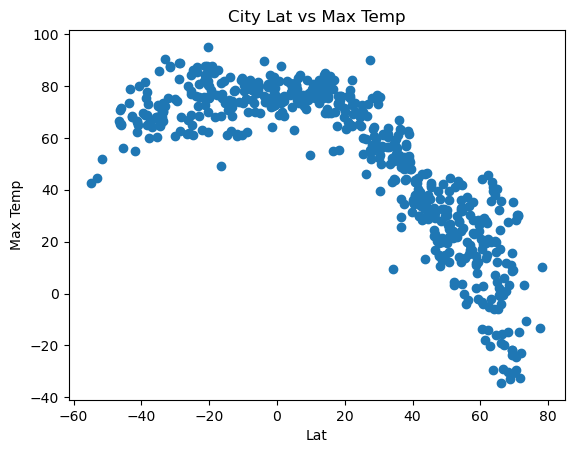

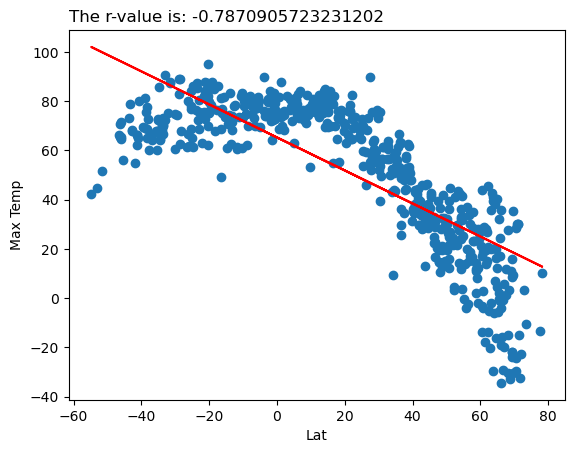

In [48]:
# Latitude vs. Temperature plot

scatter_plot("Lat","Max Temp",city_data_df)

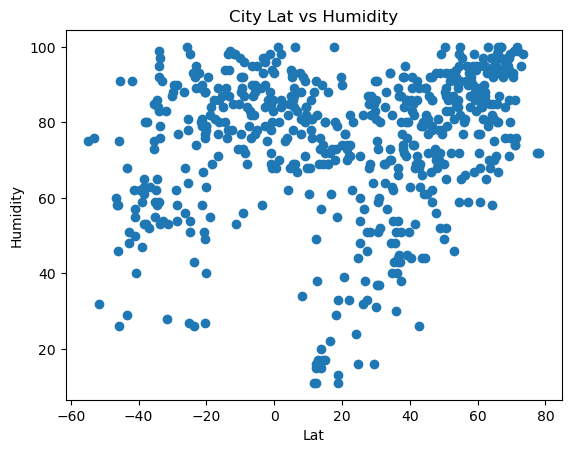

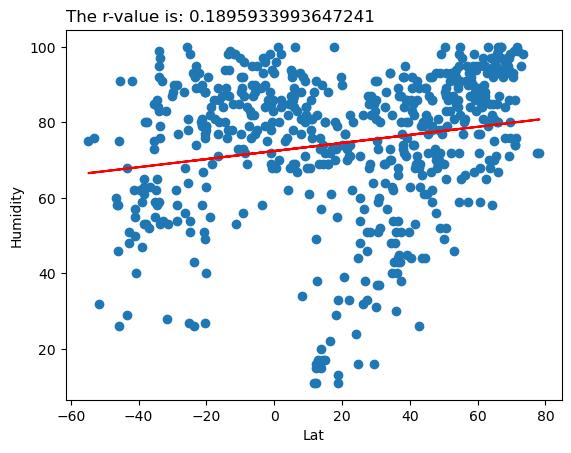

In [49]:
# Latitude vs. Humidity plot
scatter_plot("Lat","Humidity",city_data_df)

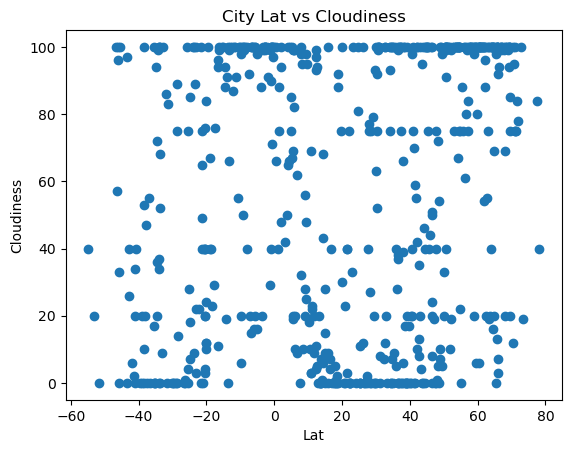

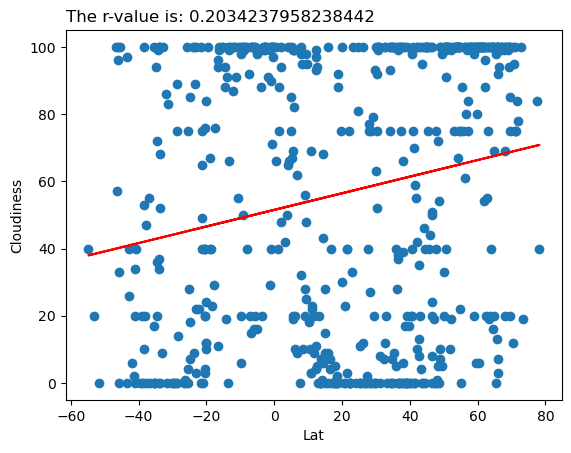

In [50]:
# Latitude vs. Cloudiness plot
scatter_plot("Lat","Cloudiness",city_data_df)

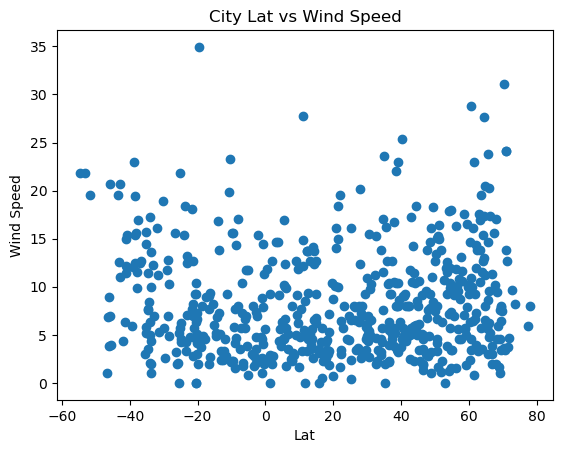

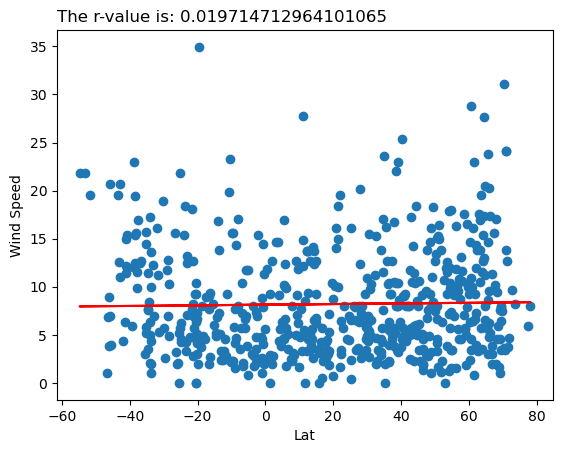

In [51]:
# Latitude vs. Wind Speed plot
scatter_plot("Lat","Wind Speed",city_data_df)

So, we're seeing a bit of a relationship between max temperature and latitude but not so much between latitude and the other data points. 

That's not too much of a surprise - latitude specifies north-south location on the globe, and most of us have learned that the equator is really hot and the poles are really cold due to how the sunlight hits. 

Wind and cloudiness and humidity can vary wildly at similar latitudes and seem to be more influenced by nearby features like lakes or mountains. (I live in Georgia now but I grew up in Arizona and it is quite a shift.)

In [37]:
# Let's consider the northern hemisphere vs the southern hemisphere. 
# Northern hemisphere will include the equator just to make things nice.
# Make 2 new dataframes, one for north, one for south.

# Let's just check something real quick.
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [43]:
# Lat is already a float, that's nice.
north_hemisph = city_data_df.loc[city_data_df['Lat']>=0]
len(north_hemisph)

403

In [44]:
south_hemisph = city_data_df.loc[city_data_df['Lat']<0]
len(south_hemisph)

182

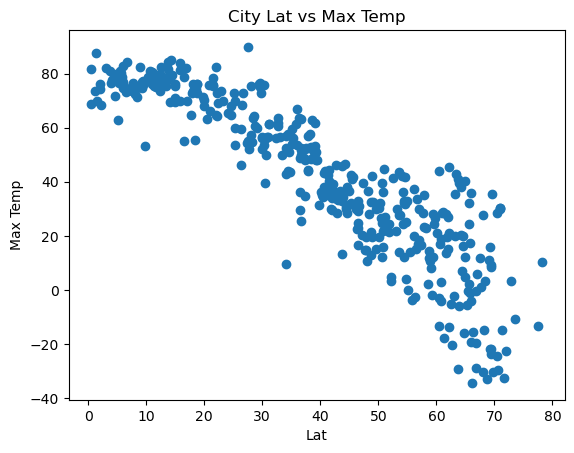

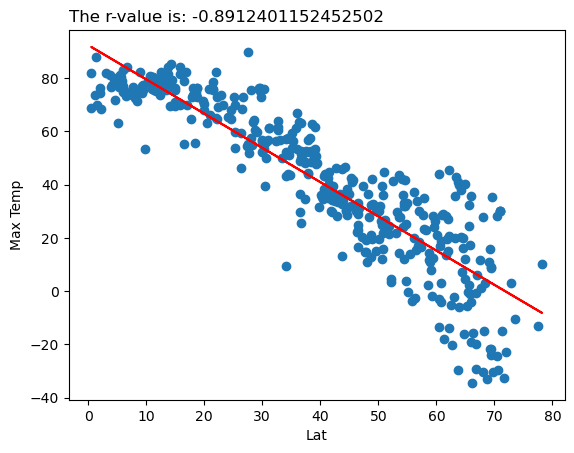

In [54]:
# Let's do all the plots again but with these new dataframes.
scatter_plot("Lat","Max Temp",north_hemisph,"North")

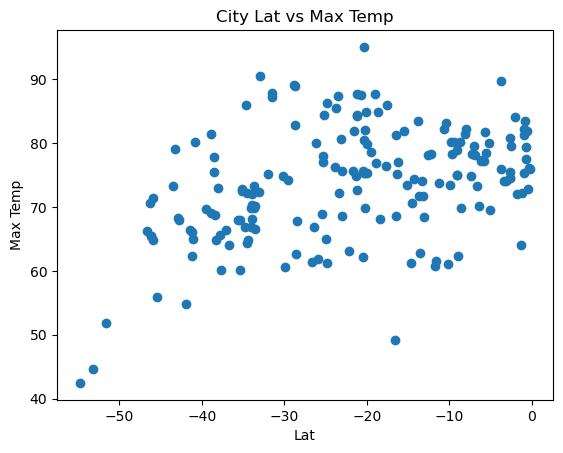

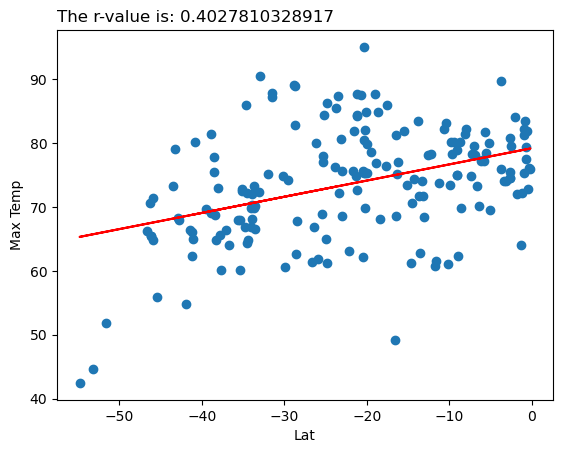

In [55]:
scatter_plot("Lat","Max Temp",south_hemisph,"South")

There is a much stronger relationship between latitude and max temperature in the northern hemisphere than the southern hemisphere.

Also not that surprising. 1) Our northern sample set is more than double the size of the southern sample set. If there is a trend, we should see it more clearly in the northern hemisphere. 2) Land mass in the northern hemisphere is spread more evenly among latitudes, so there's more human settlement there. In the southern hemisphere, you get as far down as, what, Chile? before you have to hit a ton of ocean and then Antarctica, and there are no cities there.

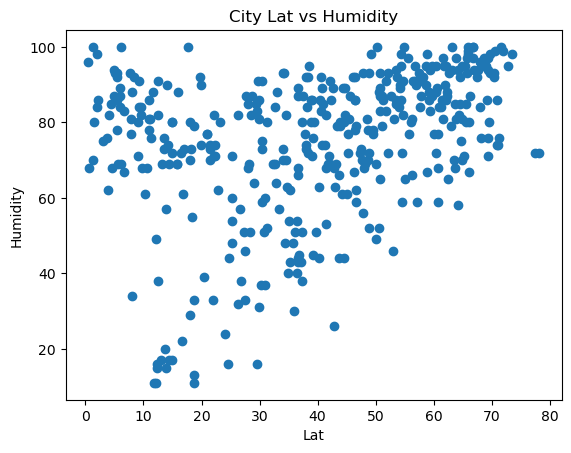

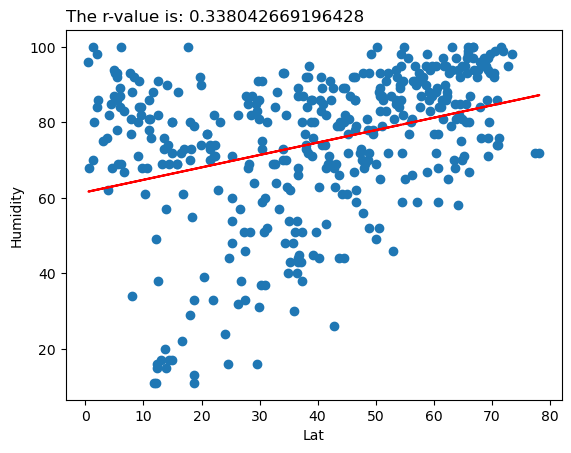

In [56]:
scatter_plot("Lat","Humidity",north_hemisph,"North")

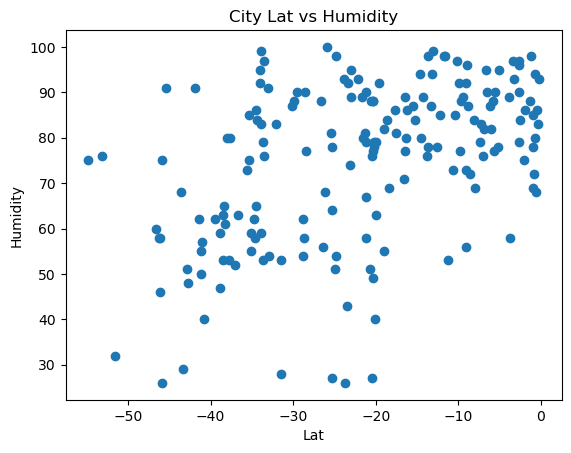

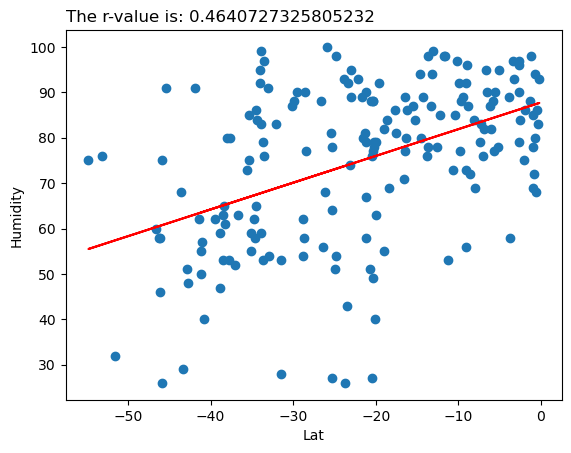

In [57]:
scatter_plot("Lat","Humidity",south_hemisph,"South")

A little bit of a trend here, but more visibly in the southern hemisphere. The northern hemisphere can be... more variable, from my limited understanding, plus the fact that we have a lot more data points up north still. Even just along the equator, there can be a lot of variability - it's usually hot but it could be rainforest hot or desert hot.

Very humid way up north - from my understanding, there's not a ton of landmass up there but it is usually surrounded by a good amount of water. Antarctica on the other hand, I've read is technically a desert with very low precipitation. If we had a city on Antarctica in this dataset, I would expect it to pull the line of best fit way way way down.

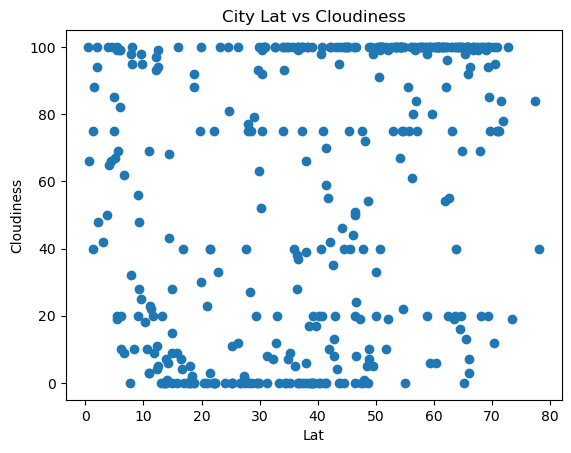

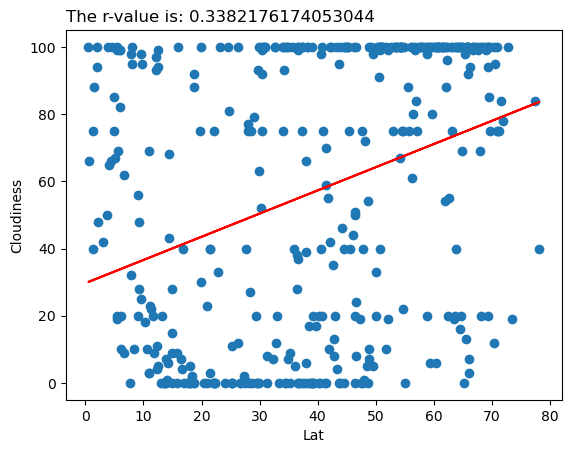

In [58]:
scatter_plot("Lat","Cloudiness",north_hemisph,"North")

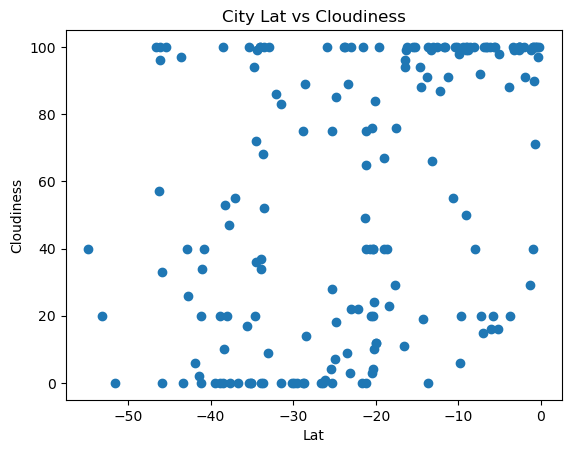

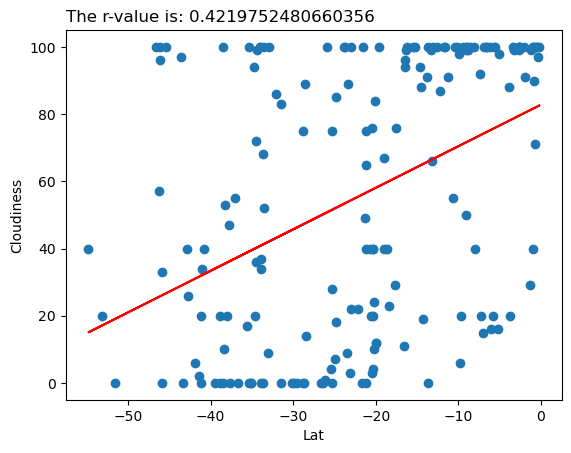

In [59]:
scatter_plot("Lat","Cloudiness",south_hemisph,"South")

I do not trust those lines of best fit at all. Even just looking at the data points, it looks like noise. I feel like it's more difficult to trust the linear regression when it doesn't match the the visual. Human brains are meant to be really good at pattern recognition, after all. Human hands, not as good at drawing 500 points.

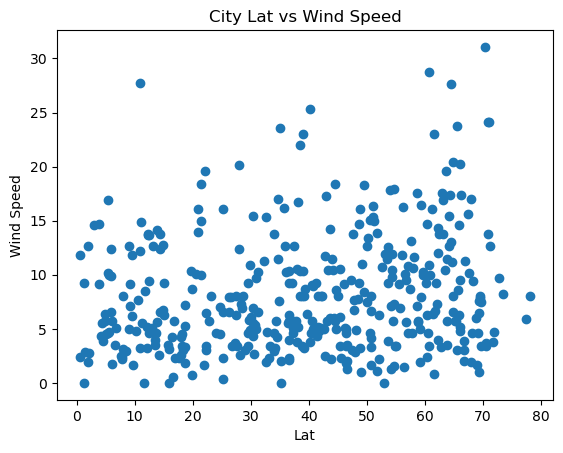

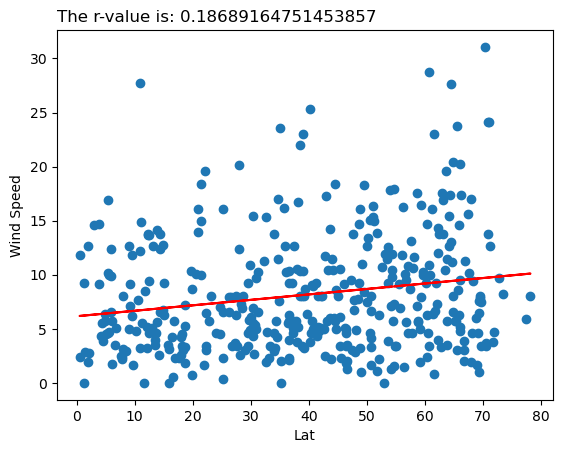

In [60]:
scatter_plot("Lat","Wind Speed",north_hemisph,"North")

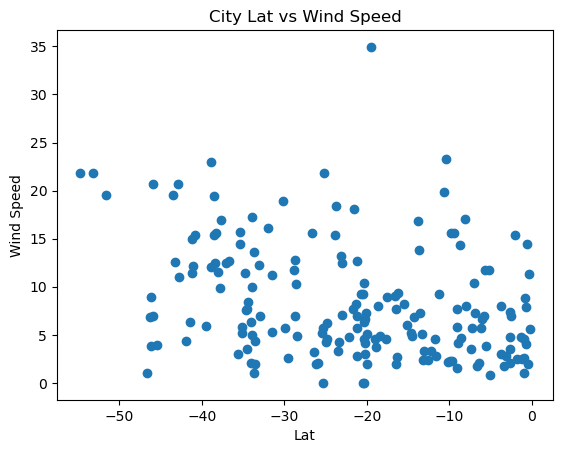

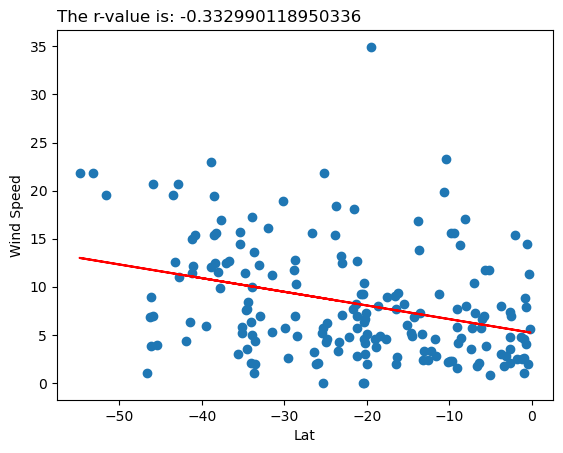

In [61]:
scatter_plot("Lat","Wind Speed",south_hemisph,"South")

I don't feel very confident about a trend relating to latitude based on these graphs either. It seems more like most places just have relatively low wind speeds, as opposed to some folks (maybe in the plains) that are getting destroyed by tornados and the like. 

I might wonder if that's on purpose though. It's really hard to build structures that can withstand hardcore wind speeds and people may be inclined to build settlements where they can avoid them as much as possible. 

The main reason to put up with awful winds is if there are a bunch of perks in the same area. Water access, trees/plant growth, domesticated animals are really good things to have, so it doesn't surprise me that, at least in the United States, there are a whole lot of people living in places like Louisiana despite the possibility of hurricanes and not so many people living in, like, Montana.

(Also I just did a quick search, and the windiest spots in the USA are in the Great Plains, basically all the boring stuff in the middle of the country with Montana, the Dakotas, Nebraska, all the way down the middle of Texas. Around Florida does have the highest hurricane risk, but the average wind speed is still way lower than those middle states. The first 2018 population density map to pop up also shows most people in the US living Not There and sticking to either the entire eastern half of the US or the west coast. I'm sure there are a lot of other things about the plains that suck, but it's weather heavy - high winds, so few trees, harsh winters, so many thunderstorms.

This doesn't really take into account US colonial history. Not surprising there are so many people on the east half of the US - that's where the settlers could sail in. Yes, I went down a rabbithole.)